# LLaMA

- [x] comprend le français ✅
- [x] sait gérer des longs textes ❌
- [x] comprend le jargon légal ✅
- [x] sait retrouver une information chiffrée ❌
- [x] comprend une instruction sur les formats de sortie 🤔
- [x] est suffisamment rapide
- [ ] sait retrouver des informations dans des tableaux
- [x] sait se débarasser du HTML
- [ ] accélération GPU
- [ ] compatibilité Metal (MPS)
- [ ] traitement en lots (batches)

Configuration: nécessite une version récente de `transformers` (>=4.28.0) et de `tokenizers` (>=0.13.3). À cette date (24/04/2022) les deux ne sont disponibles que via Github, et `tokenizers` nécessite d'être construit depuis Rust.

## 1. Français ✅

In [1]:
from transformers import pipeline

# changing config did not seem to work
# config = AutoConfig.from_pretrained("decapoda-research/llama-7b-hf")
# config.tokenizer_class = "LlamaTokenizer"
# config.architectures = ["LlamaForCausalLM"]
# llama_7b_generator = pipeline("text-generation", model="decapoda-research/llama-7b-hf", config=config)

# fist attempt will fail but will download the files
# then, in directory [home]/.cache/huggingface/hub/models--decapoda-research--llama-7b-hf/snapshots/[hash]
# manually change tokenizer_class to "LlamaTokenizer" in tokenizer_config.json
# and architectures to ["LlamaForCausalLM"] in config.json

llama_7b_generator = pipeline("text-generation", model="huggyllama/llama-7b")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
prompt = (
    "Je vais te raconter l'histoire d'une petit fille qui amène un petit pot"
    "de beurre à sa grand-mère de l'autre côté de la forêt.\n\n"
    "Un jour"
)
llama_7b_generator(prompt, max_new_tokens=200, no_repeat_ngram_size=5, do_sample=True)

[{'generated_text': "Je vais te raconter l'histoire d'une petit fille qui amène un petit potde beurre à sa grand-mère de l'autre côté de la forêt.\n\nUn jour, elle se promène avec son pot de beurre. Elle rencontre des lièvres (qu'elle appelle par erreur des lapins) dans les champs qui viennent vers elle, tout semblables à des hommes. Elle entre dans une ferme. Dans la ferme, elle voit une vieille femme qui est fendue comme une pomme de terre, car les lièvres l'ont rôtie. Elle pleure et supplie à genoux celle qu'elle considère comme sa sœur, parce que l'enfant sent sa faim.\n\n## Analyse\n\nLa fin du conte est cruelle. Elle reflète probablement la peur et la désillusion de l'auteur concernant la domination et l'expansion russe qui est en marche: ainsi, le livre est le récit d'un enfant, qui ne saurait comprendre tout le"}]

## 2. Longs textes ❌

In [16]:
some_long_legal_text = """RÈGLES DE SÉCURITÉ RELATIVES AU SOUS-SECTEUR D'ACTIVITÉS D'IMPORTANCE VITALE « ÉTABLISSEMENTS DE SANTÉ »


1. Règle relative à la politique de sécurité des systèmes d'information


L'opérateur d'importance vitale élabore, tient à jour et met en œuvre une politique de sécurité des systèmes d'information (PSSI).
La PSSI décrit l'ensemble des moyens organisationnels et techniques mis en œuvre par l'opérateur afin d'assurer la sécurité de ses systèmes d'information d'importance vitale (SIIV). En particulier, elle :


- précise les objectifs et les orientations stratégiques en matière de sécurité des SIIV ;
- décrit l'organisation de la gouvernance de la sécurité et notamment les rôles et les responsabilités du personnel interne et du personnel externe (prestataires, fournisseurs, etc.) à l'égard de la sécurité des SIIV ;
- prévoit un plan de sensibilisation à la sécurité des SIIV au profit de l'ensemble du personnel ainsi qu'un plan de formation à la sécurité des SIIV au profit des personnes ayant des responsabilités particulières, notamment les personnes en charge de l'administration et de la sécurité des SIIV et les utilisateurs disposant de droits d'accès privilégiés aux SIIV ;
- fixe les mesures de sécurité générales, notamment en matière de contrôle du personnel interne et du personnel externe, de sécurité physique des SIIV, de gestion des ressources matérielles et logicielles, de contrôle d'accès aux SIIV, d'exploitation et d'administration des SIIV et de sécurité des ressources, des réseaux et des postes de travail ;
- définit les procédures suivantes :
- la procédure d'homologation de sécurité des SIIV ;
- les procédures de contrôle et d'audit de la sécurité des SIIV ;
- la procédure de maintien en conditions de sécurité des ressources des SIIV ;
- la procédure de traitement des incidents de sécurité affectant les SIIV ;
- les procédures de gestion de crises en cas d'attaques informatiques visant des SIIV et de continuité des activités d'importance vitale.


La PSSI et ses documents d'application sont approuvés formellement par la direction de l'opérateur. L'opérateur élabore au profit de sa direction, au moins annuellement, un rapport sur la mise en œuvre de la PSSI et de ses documents d'application. Ce rapport précise notamment l'état des lieux des risques, le niveau de sécurité des SIIV et les actions de sécurisation menées.
La PSSI, ses documents d'application et les rapports sur leur mise en œuvre sont tenus à la disposition de l'Agence nationale de la sécurité des systèmes d'information.


2. Règle relative à l'homologation de sécurité


L'opérateur d'importance vitale procède à l'homologation de sécurité de chaque système d'information d'importance vitale (SIIV), en mettant en œuvre la procédure d'homologation prévue par sa politique de sécurité des systèmes d'information (PSSI).
L'homologation d'un système est une décision formelle prise par l'opérateur qui atteste que les risques pesant sur la sécurité de ce système ont été identifiés et que les mesures nécessaires pour le protéger sont mises en œuvre. Elle atteste également que les éventuels risques résiduels ont été identifiés et acceptés par l'opérateur.
Dans le cadre de l'homologation, un audit de la sécurité du SIIV doit être réalisé. Cet audit vise à vérifier l'application et l'efficacité des mesures de sécurité du SIIV et notamment le respect des règles de sécurité mentionnées dans le présent arrêté. L'audit doit permettre d'évaluer le niveau de sécurité du SIIV au regard des menaces et des vulnérabilités connues. Il comporte notamment la réalisation d'un audit d'architecture, d'un audit de configuration et d'un audit organisationnel et physique.
Cet audit est réalisé dans le respect des règles fixées par le référentiel en matière d'audit de sécurité des systèmes d'information prévu à l'article 10 du décret n° 2015-350 du 27 mars 2015 relatif à la qualification des produits de sécurité et des prestataires de service de confiance pour les besoins de la sécurité des systèmes d'information.
L'opérateur peut réaliser lui-même l'audit ou recourir à un prestataire qualifié dans les conditions prévues au chapitre III du décret n° 2015-350 du 27 mars 2015 précité.
A l'issue de l'audit, l'opérateur ou, le cas échéant, le prestataire élabore un rapport d'audit qui expose les constatations sur les mesures appliquées et sur le respect des règles de sécurité prévues par le présent arrêté. Le rapport précise si le niveau de sécurité atteint est conforme aux objectifs de sécurité, compte tenu des menaces et des vulnérabilités connues. Il formule des recommandations pour remédier aux éventuelles non-conformités et vulnérabilités découvertes.
L'opérateur prend la décision d'homologuer un SIIV sur la base du dossier d'homologation comportant notamment :


- l'analyse de risques et les objectifs de sécurité du SIIV ;
- les mesures de sécurité appliquées au SIIV ;
- les rapports d'audit de la sécurité du SIIV ;
- les risques résiduels et les raisons justifiant leur acceptation.


La validité de l'homologation est réexaminée par l'opérateur au moins tous les trois ans et lors de chaque événement ou évolution de nature à modifier le contexte décrit dans le dossier d'homologation. Chaque réexamen de l'homologation est consigné dans le dossier d'homologation. L'opérateur procède au renouvellement de l'homologation dès qu'elle n'est plus valide.
L'opérateur tient à la disposition de l'Agence nationale de la sécurité des systèmes d'information les décisions et dossiers d'homologation, notamment les rapports d'audit. Ces documents confidentiels sont susceptibles de contenir des informations dont la révélation est réprimée par les dispositions de l'article 226-13 du code pénal. Ils sont, le cas échéant, couverts par le secret de la défense nationale.
La présente règle relative à l'homologation s'applique sans préjudice des dispositions prévues par l'arrêté du 9 août 2021 portant approbation de l'instruction générale interministérielle n° 1300 sur la protection du secret de la défense nationale, en matière d'homologation des systèmes d'information traitant des informations classifiées.


3. Règle relative à la cartographie


L'opérateur d'importance vitale élabore et tient à jour, pour chaque système d'information d'importance vitale (SIIV), les éléments de cartographie suivants :


- les noms et les fonctions des applications, supportant les activités de l'opérateur, installées sur le SIIV ;
- le cas échéant, les plages d'adresses IP de sortie du SIIV vers internet ou un réseau tiers, ou accessibles depuis ces réseaux ;
- le cas échéant, les plages d'adresses IP associées aux différents sous-systèmes composant le SIIV ;
- la description fonctionnelle et les lieux d'installation du SIIV et de ses différents sous-systèmes ;
- la description fonctionnelle des points d'interconnexion du SIIV et de ses différents sous-systèmes avec des réseaux tiers, notamment la description des équipements et des fonctions de filtrage et de protection mis en œuvre au niveau de ces interconnexions ;
- l'inventaire et l'architecture des dispositifs d'administration du SIIV permettant de réaliser notamment les opérations d'installation à distance, de mise à jour, de supervision, de gestion des configurations, d'authentification ainsi que de gestion des comptes et des droits d'accès ;
- la liste des comptes disposant de droits d'accès privilégiés (appelés « comptes privilégiés ») au SIIV. Cette liste précise pour chaque compte le niveau et le périmètre des droits d'accès associés, notamment les comptes sur lesquels portent ces droits (comptes d'utilisateurs, comptes de messagerie, comptes de processus, etc.) ;
- l'inventaire, l'architecture et le positionnement des services de résolution de noms d'hôte, de messagerie, de relais internet et d'accès distant mis en œuvre par le SIIV.


Les éléments de cartographie ainsi réunis sont des documents confidentiels susceptibles de contenir des informations dont la révélation est réprimée par les dispositions de l'article 226-13 du code pénal. Ils sont, le cas échéant, couverts par le secret de la défense nationale.
Sur demande de l'Agence nationale de la sécurité des systèmes d'information, l'opérateur lui communique les éléments de cartographie mis à jour sur un support électronique, dans un format qui peut être lu par les principaux logiciels bureautiques accessibles au public.


4. Règle relative au maintien en conditions de sécurité


L'opérateur d'importance vitale élabore, tient à jour et met en œuvre une procédure de maintien en conditions de sécurité des ressources matérielles et logicielles de ses systèmes d'information d'importance vitale (SIIV), conformément à sa politique de sécurité des systèmes d'information.
Cette procédure définit les conditions permettant de maintenir le niveau de sécurité des ressources des SIIV en fonction de l'évolution des vulnérabilités et des menaces et notamment la politique d'installation de toute nouvelle version et mesure correctrice de sécurité d'une ressource et les vérifications à effectuer avant l'installation. Elle prévoit que :


- l'opérateur se tient informé des vulnérabilités et des mesures correctrices de sécurité susceptibles de concerner les ressources matérielles et logicielles de ses SIIV, qui sont diffusées notamment par les fournisseurs ou les fabricants de ces ressources ou par des centres de prévention et d'alerte en matière de cyber sécurité tels que le CERT-FR (www.cert.ssi.gouv.fr) ;
- sauf en cas de difficultés techniques ou opérationnelles justifiées, l'opérateur installe et maintient toutes les ressources matérielles et logicielles de ses SIIV dans des versions supportées par leurs fournisseurs ou leurs fabricants et mises à jour du point de vue de la sécurité ;
- préalablement à l'installation de toute nouvelle version, l'opérateur s'assure de l'origine de cette version et de son intégrité, et analyse l'impact de cette version sur le SIIV concerné d'un point de vue technique et opérationnel ;
- dès qu'il a connaissance d'une mesure correctrice de sécurité concernant une de ses ressources, et sauf en cas de difficultés techniques ou opérationnelles justifiées, l'opérateur en planifie l'installation après avoir effectué les vérifications mentionnées à l'alinéa précédent, et procède à cette installation dans les délais prévus par la procédure de maintien en conditions de sécurité ;
- lorsque des raisons techniques ou opérationnelles le justifient, l'opérateur peut décider, pour certaines ressources de ses SIIV, de ne pas installer une version supportée par le fournisseur ou le fabricant de la ressource concernée ou de ne pas installer une mesure correctrice de sécurité. Dans ce cas, l'opérateur met en œuvre des mesures techniques ou organisationnelles prévues par la procédure de maintien en conditions de sécurité pour réduire les risques liés à l'utilisation d'une version obsolète ou comportant des vulnérabilités connues. L'opérateur décrit dans le dossier d'homologation du SIIV concerné ces mesures de réduction des risques et les raisons techniques ou opérationnelles ayant empêché l'installation d'une version supportée ou d'une mesure correctrice de sécurité.


5. Règle relative à la journalisation


L'opérateur d'importance vitale met en œuvre sur chaque système d'information d'importance vitale (SIIV) un système de journalisation qui enregistre les événements relatifs à l'authentification des utilisateurs, à la gestion des comptes et des droits d'accès, à l'accès aux ressources, aux modifications des règles de sécurité du SIIV ainsi qu'au fonctionnement du SIIV.
Le système de journalisation porte sur les équipements suivants lorsqu'ils génèrent les événements mentionnés au 1er alinéa :


- les serveurs applicatifs supportant les activités d'importance vitale ;
- les serveurs d'infrastructure système ;
- les serveurs d'infrastructure réseau ;
- les équipements de sécurité ;
- les postes d'ingénierie et de maintenance des systèmes industriels ;
- les équipements réseau ;
- les postes d'administration.


Les événements enregistrés par le système de journalisation sont horodatés au moyen de sources de temps synchronisées. Ils sont, pour chaque SIIV, centralisés et archivés pendant une durée d'au moins six mois. Le format d'archivage des événements permet de réaliser des recherches automatisées sur ces événements.


6. Règle relative à la corrélation et l'analyse de journaux


L'opérateur d'importance vitale met en œuvre un système de corrélation et d'analyse de journaux qui exploite les événements enregistrés par le système de journalisation installé sur chacun des systèmes d'information d'importance vitale (SIIV), afin de détecter des événements susceptibles d'affecter la sécurité des SIIV.
Le système de corrélation et d'analyse de journaux est installé et exploité sur un système d'information mis en place exclusivement à des fins de détection d'événements susceptibles d'affecter la sécurité des systèmes d'information.
L'opérateur ou le prestataire mandaté à cet effet installe et exploite ce système de corrélation et d'analyse de journaux en s'appuyant sur les exigences du référentiel en matière de détection des incidents de sécurité prévu à l'article 10 du décret n° 2015-350 du 27 mars 2015 relatif à la qualification des produits de sécurité et des prestataires de service de confiance pour les besoins de la sécurité des systèmes d'information.


7. Règle relative à la détection


L'opérateur d'importance vitale met en œuvre, en application de l'article R. 1332-41-3 du code de la défense, un système de détection qualifié de type « sonde d'analyse de fichiers et de protocoles ».
Les sondes d'analyse de fichiers et de protocoles analysent les flux de données transitant par ces sondes afin de rechercher des événements susceptibles d'affecter la sécurité des systèmes d'information d'importance vitale (SIIV). Elles sont positionnées de manière à pouvoir analyser l'ensemble des flux échangés entre les SIIV et les systèmes d'information tiers à ceux de l'opérateur.
Ces systèmes de détection sont exploités selon les règles fixées par le référentiel en matière de détection des incidents de sécurité prévu à l'article 10 du décret n° 2015-350 du 27 mars 2015 relatif à la qualification des produits de sécurité et des prestataires de service de confiance pour les besoins de la sécurité des systèmes d'information. Ils sont exploités par un service de l'Etat ou un prestataire qualifié à cet effet dans les conditions prévues par le décret précité.


8. Règle relative au traitement des incidents de sécurité


L'opérateur d'importance vitale élabore, tient à jour et met en œuvre une procédure de traitement des incidents affectant le fonctionnement ou la sécurité de ses systèmes d'information d'importance vitale (SIIV), conformément à sa politique de sécurité des systèmes d'information.
L'opérateur ou le prestataire mandaté à cet effet procède au traitement des incidents en s'appuyant sur les exigences du référentiel en matière de réponse aux incidents de sécurité prévu à l'article 10 du décret n° 2015-350 du 27 mars 2015 relatif à la qualification des produits de sécurité et des prestataires de service de confiance pour les besoins de la sécurité des systèmes d'information.
Un système d'information spécifique doit être mis en place pour traiter les incidents, notamment pour stocker les relevés techniques relatifs aux analyses des incidents. Ce système est cloisonné vis-à-vis du SIIV concerné par l'incident.
L'opérateur conserve les relevés techniques relatifs aux analyses des incidents pendant une durée d'au moins six mois. Il tient ces relevés techniques à la disposition de l'Agence nationale de la sécurité des systèmes d'information.
Les relevés techniques sont des documents confidentiels susceptibles de contenir des informations dont la révélation est réprimée par les dispositions de l'article 226-13 du code pénal. Ils sont, le cas échéant, couverts par le secret de la défense nationale.


9. Règle relative au traitement des alertes


L'opérateur d'importance vitale met en place un service de permanence lui permettant de prendre connaissance, à tout moment et sans délai, d'informations transmises par l'Agence nationale de la sécurité des systèmes d'information relatives à des incidents, des vulnérabilités et des menaces. Il met en œuvre une procédure pour traiter les informations ainsi reçues et le cas échéant prendre les mesures de sécurité nécessaires à la protection de ses systèmes d'information d'importance vitale (SIIV).
L'opérateur communique à l'Agence nationale de la sécurité des systèmes d'information les coordonnées (nom du service, numéro de téléphone et adresse électronique) tenues à jour du service de permanence prévu à l'alinéa précédent.


10. Règle relative à la gestion de crises


L'opérateur d'importance vitale élabore, tient à jour et met en œuvre une procédure de gestion de crises en cas d'attaques informatiques majeures, conformément à sa politique de sécurité des systèmes d'information.
Cette procédure décrit les moyens techniques et organisationnels dont dispose l'opérateur pour mettre en œuvre les mesures décidées par la Première ministre en cas de crises, notamment les mesures suivantes :


- configurer les systèmes d'information de manière à éviter les attaques ou à en limiter les effets. Cette configuration peut viser :
- à proscrire l'utilisation de supports de stockage amovibles ou la connexion d'équipements nomades aux systèmes d'information de l'opérateur ;
- à installer une mesure correctrice de sécurité sur un système d'information particulier ;
- à restreindre le routage ;
- mettre en place des règles de filtrage sur les réseaux ou des configurations particulières sur les équipements terminaux. Cette mesure peut viser :
- à effectuer des restrictions d'accès sous forme de listes blanches et de listes noires d'utilisateurs ;
- à bloquer les échanges de fichiers d'un type particulier ;
- à isoler de tout réseau des sites internet, des applications, ou des équipements informatiques de l'opérateur en sollicitant le cas échéant l'appui des opérateurs publics de communications électroniques ;
- isoler du réseau internet les systèmes d'information de l'opérateur. Cette mesure impose de déconnecter physiquement ou logiquement les interfaces réseau des systèmes d'information concernés.


La procédure précise les conditions dans lesquelles ces mesures peuvent être appliquées compte tenu des contraintes techniques et organisationnelles de mise en œuvre.


11. Règle relative à l'identification


L'opérateur d'importance vitale crée des comptes individuels pour tous les utilisateurs (y compris les utilisateurs ayant des comptes privilégiés ou des comptes d'administration) et pour les processus automatiques accédant aux ressources de ses systèmes d'information d'importance vitale (SIIV).
Lorsque des raisons techniques ou opérationnelles ne permettent pas de créer de comptes individuels pour les utilisateurs ou pour les processus automatiques, l'opérateur met en place des mesures permettant de réduire le risque lié à l'utilisation de comptes partagés et d'assurer la traçabilité de l'utilisation de ces comptes. Dans ce cas, l'opérateur décrit ces mesures dans le dossier d'homologation du SIIV concerné et les raisons justifiant le recours à des comptes partagés.
L'opérateur désactive sans délai les comptes qui ne sont plus nécessaires.


12. Règle relative à l'authentification


L'opérateur d'importance vitale protège les accès aux ressources de ses systèmes d'information d'importance vitale (SIIV), que ce soit par un utilisateur ou par un processus automatique, au moyen d'un mécanisme d'authentification impliquant un élément secret.
L'opérateur définit, conformément à sa politique de sécurité des systèmes d'information, les règles de gestion des éléments secrets d'authentification mis en œuvre dans ses SIIV.
Lorsque la ressource le permet techniquement, les éléments secrets d'authentification doivent pouvoir être modifiés par l'opérateur chaque fois que cela est nécessaire. Dans ce cas, l'opérateur respecte les règles suivantes :


- l'opérateur doit modifier les éléments secrets d'authentification lorsqu'ils ont été installés par le fabricant ou le fournisseur de la ressource, avant sa mise en service. A cet effet, l'opérateur s'assure auprès du fabricant ou du fournisseur qu'il dispose des moyens et des droits permettant de réaliser ces opérations ;
- l'élément secret d'authentification d'un compte partagé doit être renouvelé régulièrement et à chaque retrait d'un utilisateur de ce compte ;
- les utilisateurs qui n'en ont pas la responsabilité, ne peuvent pas modifier les éléments secrets d'authentification. Ils ne peuvent pas non plus accéder à ces éléments en clair ;
- lorsque les éléments secrets d'authentification sont des mots de passe, les utilisateurs ne doivent pas les réutiliser entre comptes privilégiés ou entre un compte privilégié et un compte non privilégié ;
- lorsque les éléments secrets d'authentification sont des mots de passe, ceux-ci sont conformes aux règles de l'art telles que celles préconisées par l'Agence nationale de la sécurité des systèmes d'information, en matière de complexité (longueur du mot de passe et types de caractères), en tenant compte du niveau de complexité maximal permis par la ressource concernée, et en matière de renouvellement.


Lorsque la ressource ne permet pas techniquement de modifier l'élément secret d'authentification, l'opérateur met en place un contrôle d'accès approprié à la ressource concernée ainsi que des mesures de traçabilité des accès et de réduction du risque lié à l'utilisation d'un élément secret d'authentification fixe. L'opérateur décrit dans le dossier d'homologation du SIIV concerné ces mesures et les raisons techniques ayant empêché la modification de l'élément secret d'authentification.


13. Règle relative aux droits d'accès


L'opérateur d'importance vitale définit, conformément à sa politique de sécurité des systèmes d'information, les règles de gestion et d'attribution des droits d'accès aux ressources de ses systèmes d'information d'importance vitale (SIIV), et respecte les règles suivantes :


- l'opérateur n'attribue à un utilisateur ou à un processus automatique les droits d'accès à une ressource que si cet accès est strictement nécessaire à l'exercice des missions de l'utilisateur ou au fonctionnement du processus automatique ;
- l'opérateur définit les accès aux différentes fonctionnalités de cette ressource et en attribue les droits uniquement aux utilisateurs et aux processus automatiques qui en ont strictement le besoin ;
- les droits d'accès sont révisés périodiquement, au moins tous les ans, par l'opérateur. Cette révision porte sur les liens entre les comptes, les droits d'accès associés et les ressources ou les fonctionnalités qui en font l'objet ;
- l'opérateur établit et tient à jour la liste des comptes privilégiés. Toute modification d'un compte privilégié (ajout, suppression, suspension ou modification des droits associés) fait l'objet d'un contrôle formel de l'opérateur destiné à vérifier que les droits d'accès aux ressources et fonctionnalités sont attribués selon le principe du moindre privilège (seuls les droits strictement nécessaires sont accordés) et en cohérence avec les besoins d'utilisation du compte.


14. Règle relative aux comptes d'administration


L'opérateur d'importance vitale crée des comptes (appelés « comptes d'administration ») destinés aux seules personnes (appelées administrateurs) chargées d'effectuer les opérations d'administration (installation, configuration, gestion, maintenance, supervision, etc.) des ressources de ses systèmes d'information d'importance vitale (SIIV).
L'opérateur définit, conformément à sa politique de sécurité des systèmes d'information, les règles de gestion et d'attribution des comptes d'administration de ses SIIV, et respecte les règles suivantes :


- l'attribution des droits aux administrateurs respecte le principe du moindre privilège (seuls les droits strictement nécessaires sont accordés). En particulier, afin de limiter la portée des droits individuels, ils sont attribués à chaque administrateur en les restreignant autant que possible au périmètre fonctionnel et technique dont cet administrateur est responsable ;
- un compte d'administration est utilisé exclusivement pour se connecter à un système d'information d'administration (système d'information utilisé pour les opérations d'administration des ressources) ou à une ressource administrée ;
- les opérations d'administration sont effectuées exclusivement à partir de comptes d'administration, et inversement, les comptes d'administration sont utilisés exclusivement pour les opérations d'administration ;
- lorsque l'administration d'une ressource ne peut pas techniquement être effectuée à partir d'un compte spécifique d'administration, l'opérateur met en place des mesures permettant d'assurer la traçabilité et le contrôle des opérations d'administration réalisées sur cette ressource et des mesures de réduction du risque lié à l'utilisation d'un compte non spécifique à l'administration. Il décrit dans le dossier d'homologation du SIIV concerné ces mesures ainsi que les raisons techniques ayant empêché l'utilisation d'un compte d'administration ;
- l'opérateur établit et tient à jour la liste des comptes d'administration de ses SIIV et les gère en tant que comptes privilégiés.


15. Règle relative aux systèmes d'information d'administration


L'opérateur d'importance vitale applique les règles suivantes aux systèmes d'information utilisés pour effectuer l'administration de ses systèmes d'information d'importance vitale (SIIV), qui sont appelés « systèmes d'information d'administration » :


- les ressources matérielles et logicielles des systèmes d'information d'administration sont gérées et configurées par l'opérateur ou, le cas échéant, par le prestataire qu'il a mandaté pour réaliser les opérations d'administration ;
- les ressources matérielles et logicielles des systèmes d'information d'administration sont utilisées exclusivement pour réaliser des opérations d'administration. Cependant, lorsque des raisons techniques ou organisationnelles le justifient, le poste de travail physique de l'administrateur peut être utilisé pour réaliser des opérations autres que des opérations d'administration. Dans ce cas, des mécanismes de durcissement du système d'exploitation du poste de travail et de cloisonnement doivent être mis en place pour permettre d'isoler l'environnement logiciel utilisé pour ces autres opérations de l'environnement logiciel utilisé pour les opérations d'administration ;
- un environnement logiciel utilisé pour effectuer des opérations d'administration ne doit pas être utilisé à d'autres fins, comme l'accès à des sites ou serveurs de messagerie sur internet ;
- un utilisateur ne doit pas se connecter à un système d'information d'administration au moyen d'un environnement logiciel utilisé pour d'autres fonctions que des opérations d'administration ;
- les flux de données associés à des opérations autres que des opérations d'administration doivent, lorsqu'ils transitent sur les systèmes d'information d'administration, être cloisonnés au moyen de mécanismes de chiffrement et d'authentification conformes aux règles préconisées par l'Agence nationale de la sécurité des systèmes d'information ;
- les systèmes d'information d'administration sont connectés aux ressources à administrer au travers d'une liaison réseau physique utilisée exclusivement pour les opérations d'administration. Ces ressources sont administrées au travers de leur interface d'administration physique. Lorsque des raisons techniques empêchent d'administrer une ressource au travers d'une liaison réseau physique ou de son interface d'administration physique, l'opérateur met en œuvre des mesures de réduction du risque telles que des mesures de sécurité logique. Dans ce cas, il décrit ces mesures et leurs justifications dans le dossier d'homologation du SIIV concerné ;
- lorsqu'ils ne circulent pas dans le système d'information d'administration, les flux d'administration sont protégés par des mécanismes de chiffrement et d'authentification conformes aux règles préconisées par l'Agence nationale de la sécurité des systèmes d'information. Si le chiffrement et l'authentification de ces flux ne sont pas possibles pour des raisons techniques, l'opérateur met en œuvre des mesures permettant de protéger la confidentialité et l'intégrité de ces flux et de renforcer le contrôle et la traçabilité des opérations d'administration. Dans ce cas, il décrit ces mesures et leurs justifications dans le dossier d'homologation du SIIV concerné ;
- les journaux enregistrant les événements générés par les ressources utilisées par les administrateurs ne contiennent aucun mot de passe ou autre élément secret d'authentification en clair ou sous forme d'empreinte cryptographique.


16. Règle relative au cloisonnement


L'opérateur d'importance vitale procède au cloisonnement de ses systèmes d'information d'importance vitale (SIIV) afin de limiter la propagation des attaques informatiques au sein de ses systèmes ou ses sous-systèmes. Il respecte les règles suivantes :


- chaque SIIV est cloisonné physiquement ou logiquement vis-à-vis des autres systèmes d'information de l'opérateur et des systèmes d'information de tiers ;
- lorsqu'un SIIV est lui-même constitué de sous-systèmes, ceux-ci sont cloisonnés entre eux physiquement ou logiquement. Un sous-système peut être constitué pour assurer une fonctionnalité ou un ensemble homogène de fonctionnalités d'un SIIV ou encore pour isoler des ressources d'un SIIV nécessitant un même besoin de sécurité ;
- seules les interconnexions strictement nécessaires au bon fonctionnement et à la sécurité d'un SIIV sont mises en place entre le SIIV et les autres systèmes ou entre les sous-systèmes du SIIV.


L'opérateur décrit dans le dossier d'homologation de chaque SIIV les mécanismes de cloisonnement qu'il met en place.


17. Règle relative au filtrage


L'opérateur d'importance vitale met en place des mécanismes de filtrage des flux de données circulant dans ses systèmes d'information d'importance vitale (SIIV) afin de bloquer la circulation des flux inutiles au fonctionnement de ses systèmes et susceptibles de faciliter des attaques informatiques. Il respecte les règles suivantes :


- l'opérateur définit les règles de filtrage des flux de données (filtrage sur les adresses réseau, sur les protocoles, sur les numéros de port, etc.) permettant de limiter la circulation des flux aux seuls flux de données nécessaires au fonctionnement et à la sécurité de ses SIIV ;
- les flux entrants et sortants des SIIV ainsi que les flux entre sous-systèmes des SIIV sont filtrés au niveau de leurs interconnexions de manière à ne permettre la circulation que des seuls flux strictement nécessaires au fonctionnement et à la sécurité des SIIV. Les flux qui ne sont pas conformes aux règles de filtrage sont bloqués par défaut ;
- l'opérateur établit et tient à jour une liste des règles de filtrage mentionnant l'ensemble des règles en vigueur ou supprimées depuis moins d'un an. Cette liste précise pour chaque règle :
- le motif et la date de la mise en œuvre, de la modification ou de la suppression de la règle ;
- les modalités techniques de mise en œuvre de la règle.


L'opérateur décrit dans le dossier d'homologation de chaque SIIV les mécanismes de filtrage qu'il met en place.


18. Règle relative aux accès à distance


L'opérateur d'importance vitale protège les accès à ses systèmes d'information d'importance vitale (SIIV) effectués à travers des systèmes d'information tiers. En particulier, lorsque l'opérateur ou un prestataire qu'il a mandaté à cet effet accède à un SIIV à travers un système d'information tiers à ceux de l'opérateur ou du prestataire, l'opérateur applique ou fait appliquer à son prestataire les règles suivantes :


- l'accès au SIIV est protégé par des mécanismes de chiffrement et d'authentification conformes aux règles préconisées par l'Agence nationale de la sécurité des systèmes d'information ;
- le mécanisme d'authentification utilisé est renforcé en mettant en œuvre une authentification à double facteur (authentification impliquant à la fois un élément secret et un autre élément propre à l'utilisateur) ;
- les équipements utilisés pour accéder au SIIV sont gérés et configurés par l'opérateur ou, le cas échéant, par le prestataire. Les mémoires de masse de ces équipements sont en permanence protégées par des mécanismes de chiffrement et d'authentification conformes aux règles préconisées par l'Agence nationale de la sécurité des systèmes d'information.


19. Règle relative à l'installation de services et d'équipements


L'opérateur d'importance vitale respecte les règles suivantes lorsqu'il installe des services et des équipements sur ses systèmes d'information d'importance vitale (SIIV) :


- l'opérateur installe sur ses SIIV les seuls services et fonctionnalités qui sont indispensables au fonctionnement ou à la sécurité de ses SIIV. L'opérateur désactive les services et les fonctionnalités qui ne sont pas indispensables, notamment ceux installés par défaut, et les désinstalle si cela est possible. Lorsque la désinstallation n'est pas possible, l'opérateur le mentionne dans le dossier d'homologation du SIIV concerné en précisant les services et fonctionnalités concernés et les mesures de réduction du risque mises en œuvre ;
- l'opérateur ne connecte à ses SIIV que des équipements, matériels périphériques et supports amovibles qu'il a dûment répertoriés et qui sont indispensables au fonctionnement ou à la sécurité de ses SIIV ;
- les supports amovibles inscriptibles connectés aux SIIV sont utilisés exclusivement pour les besoins de ces SIIV ;
- l'opérateur procède, avant chaque utilisation de supports amovibles, à l'analyse de leur contenu, notamment à la recherche de code malveillant. L'opérateur met en place, sur les équipements auxquels sont connectés ces supports amovibles, des mécanismes de protection contre les risques d'exécution de code malveillant provenant de ces supports.


20. Règle relative aux indicateurs


L'opérateur d'importance vitale évalue et tient à jour, pour chaque système d'information d'importance vitale (SIIV), les indicateurs suivants :


- des indicateurs relatifs au maintien en conditions de sécurité des ressources :
- le pourcentage de postes utilisateurs dont les ressources systèmes ne sont pas installées dans une version supportée par le fournisseur ou le fabricant ;
- le pourcentage de serveurs dont les ressources systèmes ne sont pas installées dans une version supportée par le fournisseur ou le fabricant ;
- le pourcentage de postes utilisateurs dont les ressources systèmes ne sont pas mises à jour ou corrigées du point de vue de la sécurité depuis au moins 15 jours à compter de la disponibilité des versions mises à jour ;
- le pourcentage de serveurs dont les ressources systèmes ne sont pas mises à jour ou corrigées du point de vue de la sécurité depuis au moins 15 jours à compter de la disponibilité des versions mises à jour ;
- des indicateurs relatifs aux droits d'accès des utilisateurs et à l'authentification des accès aux ressources :
- le pourcentage d'utilisateurs accédant au SIIV au moyen de comptes partagés ;
- le pourcentage d'utilisateurs accédant au SIIV au moyen de comptes privilégiés ;
- le pourcentage de ressources dont les éléments secrets d'authentification ne peuvent pas être modifiés par l'opérateur ;
- des indicateurs relatifs à l'administration des ressources :
- le pourcentage de ressources administrées dont l'administration est effectuée à partir d'un compte non spécifique d'administration ;
- le pourcentage de ressources administrées dont l'administration ne peut pas être effectuée au travers d'une liaison réseau physique ou d'une interface d'administration physique ;
- le pourcentage de ressources administrées dont les flux d'administration ne peuvent pas être protégés par des mécanismes de chiffrement et d'authentification lorsque ces flux ne circulent pas dans le système d'information d'administration.


L'opérateur précise pour chaque indicateur la méthode d'évaluation employée et, le cas échéant, la marge d'incertitude de son évaluation. Lorsqu'un indicateur évolue de façon significative par rapport à l'évaluation précédente, l'opérateur en précise les raisons.
Les indicateurs ainsi réunis sont des documents confidentiels susceptibles de contenir des informations dont la révélation est réprimée par les dispositions de l'article 226-13 du code pénal. Ils sont, le cas échéant, couverts par le secret de la défense nationale.
L'opérateur communique, une fois par an, à l'Agence nationale de la sécurité des systèmes d'information, ces indicateurs mis à jour sur un support électronique, dans un format qui peut être lu par les principaux logiciels bureautiques accessibles au public."""

In [5]:
prompt = (
    "Contexte:\n\n"
    + some_long_legal_text
    + "\n\n----------\n\n"
    + "Instruction: résumer ce que fait ce texte en quelques phrases.\n\n----------\n\n"
)

In [8]:
tokenized_prompt = llama_7b_generator.tokenizer(prompt)
len(tokenized_prompt["input_ids"])  # 10 615 tokens > 2 048

Token indices sequence length is longer than the specified maximum sequence length for this model (10615 > 2048). Running this sequence through the model will result in indexing errors


10615

## 3. Jargon légal ✅

In [11]:
context = (
    "Le propriétaire dont les fonds sont enclavés et qui n'a sur la voie publique aucune issue, "
    "ou qu'une issue insuffisante, soit pour l'exploitation agricole, industrielle ou commerciale de sa propriété, "
    "soit pour la réalisation d'opérations de construction ou de lotissement, est fondé à réclamer sur les fonds "
    "de ses voisins un passage suffisant pour assurer la desserte complète de ses fonds, à charge d'une "
    "indemnité proportionnée au dommage qu'il peut occasionner."
)
question = "Que signigie 'fonds' dans le texte ?"
prompt = (
    "Contexte:\n\n"
    + context
    + "\n\n----------\n\n"
    + "Question:"
    + question
    + "\n\n----------\n\n"
    + "Réponse:"
)

In [13]:
llama_7b_generator(
    prompt, max_new_tokens=200
)  # Le terme de 'fonds' est employé dans le sens de terrain.

[{'generated_text': "Contexte:\n\nLe propriétaire dont les fonds sont enclavés et qui n'a sur la voie publique aucune issue, ou qu'une issue insuffisante, soit pour l'exploitation agricole, industrielle ou commerciale de sa propriété, soit pour la réalisation d'opérations de construction ou de lotissement, est fondé à réclamer sur les fonds de ses voisins un passage suffisant pour assurer la desserte complète de ses fonds, à charge d'une indemnité proportionnée au dommage qu'il peut occasionner.\n\n----------\n\nQuestion:Que signigie 'fonds' dans le texte ?\n\n----------\n\nRéponse:\n\nLe terme de 'fonds' est employé dans le sens de terrain.\n\n----------\n\nQuestion:\n\nQu'est-ce que 'enclavé'?\n\n----------\n\nRéponse:\n\nLe terme d'enclavé est employé dans le sens de terrain entouré de terrains appartenant à d'autres propriétaires.\n\n----------\n\nQuestion:\n\nQu'est-ce que 'neighbour'?\n\n----------\n\nRéponse:\n\nLe terme de 'neighbour' est employé dans le sens de voisin.\n\n----

## 4. Informations chiffrées ❌

Est-ce que le modèle sait retrouver des informations quantitatives dans un texte ?

In [4]:
context = (
    "I. A l'exception des salaires entrant dans le champ d'application de l'article 182 A bis, "
    "les traitements, salaires, pensions et rentes viagères, de source française, "
    "servis à des personnes qui ne sont pas fiscalement domiciliées en France donnent"
    "lieu à l'application d'une retenue à la source.\n\n"
    "II. La base de cette retenue est constituée par le montant net des sommes versées, "
    "déterminé conformément aux règles applicables en matière d'impôt sur le revenu, "
    "à l'exclusion de celles qui prévoient la déduction des frais professionnels réels.\n\n"
    "III.-La retenue est calculée, selon un tarif correspondant à une durée d'un an, ",
    "en appliquant à la fraction des sommes soumises à retenue qui excède 15 228 € le taux de :\n"
    "a) 12 % pour la fraction supérieure à 15 228 € et inférieure ou égale à 44 172 € ;\n"
    "b) 20 % pour la fraction supérieure à 44 172 €.\n"
    "Les taux de 12 % et 20 % mentionnés aux a et b du présent III sont ramenés, respectivement, "
    "à 8 % et 14,4 % dans les départements d'outre-mer.\n"
    "Lorsque les sommes soumises à retenue sont payées par trimestre, au mois, à la semaine "
    "ou à la journée, les limites des tranches du tarif annuel prévu au présent III sont "
    "divisées respectivement par 4, par 12, par 52 ou par 312.\n\n"
    "IV.-Chacune des limites des tranches du tarif prévu au III est révisée chaque année dans "
    "la même proportion que la limite supérieure de la première tranche du barème de l'impôt "
    "sur le revenu. Les montants obtenus sont arrondis à l'euro le plus proche ; la fraction "
    "d'euro égale à 0,5 est comptée pour 1.\n\n"
    "V. La retenue s'impute sur le montant de l'impôt sur le revenu établi dans les conditions "
    "prévues à l'article 197 A.\n\n",
)

"I. A l'exception des salaires entrant dans le champ d'application de l'article 182 A bis, les traitements, salaires, pensions et rentes viagères, de source française, servis à des personnes qui ne sont pas fiscalement domiciliées en France donnentlieu à l'application d'une retenue à la source.\n\nII. La base de cette retenue est constituée par le montant net des sommes versées, déterminé conformément aux règles applicables en matière d'impôt sur le revenu, à l'exclusion de celles qui prévoient la déduction des frais professionnels réels.\n\nIII.-La retenue est calculée, selon un tarif correspondant à une durée d'un an, "

In [5]:
question = (
    "Quelle est la limite entre les deux tranches de retenue à la source en métropole?"
)
prompt = (
    "Contexte:\n\n"
    + context[0]
    + "\n\n----------\n\n"
    + "Question:"
    + question
    + "\n\n----------\n\n"
    + "Réponse:"
)

In [6]:
llama_7b_generator(
    prompt, max_new_tokens=200
)  # Réponse attendue : 44 172 € ; Réponse fournie : 1000 euros.

[{'generated_text': "Contexte:\n\nI. A l'exception des salaires entrant dans le champ d'application de l'article 182 A bis, les traitements, salaires, pensions et rentes viagères, de source française, servis à des personnes qui ne sont pas fiscalement domiciliées en France donnentlieu à l'application d'une retenue à la source.\n\nII. La base de cette retenue est constituée par le montant net des sommes versées, déterminé conformément aux règles applicables en matière d'impôt sur le revenu, à l'exclusion de celles qui prévoient la déduction des frais professionnels réels.\n\nIII.-La retenue est calculée, selon un tarif correspondant à une durée d'un an, \n\n----------\n\nQuestion:Quelle est la limite entre les deux tranches de retenue à la source en métropole?\n\n----------\n\nRéponse:\n\nLa limite entre les deux tranches de retenue à la source en métropole est de 1 000 euros.\n\n### Article 182 B\n\nArticle 182 B\n\nI. La retenue à la source est due sur les traitements, salaires, pensi

## 5. Instructions sur les formats de sortie 🤔

Exemples: ne pas inclure d'unité, utiliser le point à la place de la virgule, utiliser un séparateur de milieur

In [10]:
llama_7b_generator(
    (
        "Question: Réécris 'deux mille cinq cent euros et trois centimes' en chiffre, "
        "sans donner d'unité et avec le point comme séparateur décimal.\n\nRéponse:"
    ),
    max_new_tokens=200,
    no_repeat_ngram_size=5,
)  # Attendu : 2500.03 ; Répondu : 2 553

[{'generated_text': "Question: Réécris 'deux mille cinq cent euros et trois centimes' en chiffre, sans donner d'unité et avec le point comme séparateur décimal.\n\nRéponse: 2 553\n\nQuestion: Réécris le chiffre 2 500 en chiffre.\n\nRéponses: 2 000\n\nQuestion: Quel chiffre représente 2 560?\n\nRéponse: 2 600\n\n### 2010\n\nQuestion : Réécris le nombre 2 570 en chiffres.\n\nRésolution : 2 5 70\n\nQuestion  : Réécris 2 580 en chiffrage.\n\nRécapitulatif :\n\n### Résultats\n\nRésultats des concours de 2005 à 2015\n\n### Statistiques\n\n* 2004 : 10 000 candidats\n* 21 00"}]

In [12]:
llama_7b_generator(
    (
        "Utilisateur: je te donne des chiffres en toutes lettres, tu dois les écrire en chiffre "
        "MAIS tu ne dois pas donner les unités, et tu dois utiliser le point comme séparateur décimal. "
        "Par exemple, si je te donne 'deux mille cinq cent euros et trois centimes' tu dois me répondre '2500.03'.\n"
        "Entrée: cinq cent livres et quatre-vingt  pence\n"
        "Assistant:"
    ),
    max_new_tokens=200,
    no_repeat_ngram_size=5,
)  # Attendu : 500.80 ; Répondu : 500.40 :/

[{'generated_text': "Utilisateur: je te donne des chiffres en toutes lettres, tu dois les écrire en chiffreMAIS tu ne dois pas donner les unités, et tu dois utiliser le point comme séparateur décimal. Par exemple, si je te donne 'deux mille cinq cent euros et trois centimes' tu dois me répondre '2500.03'.\nEntrée: cinq cent livres et quatre-vingt  pence\nAssistant: 500.40\nEntrée : 5000 euros\nAssistant:  5000\nEntrées : 50 000 eu\nAssistant:   50000\n\nCommentaires:\n\n* Les chiffres sont en chiffre MAIS les unités sont en chiffres arabes.\n* Les chiffrés sont en chiffré MAIS les unitès sont en chiffrer.\n* Les unités sont en point.\n* Les points sont en point."}]

## 6. Rapidité

Combien de temps prends le traitement d'un texte ? Il y a probablement un coût par token en entrée et un coût par token en sortie.

In [17]:
from time import time
import torch

# take a sequence of tokens of varying length
# and return a sequence of varying length
in_lens = [10, 20, 40, 80, 160, 320]
out_lens = [10, 20, 40, 80, 160, 320]
times = torch.zeros((len(in_lens), len(out_lens)))

for i, in_len in enumerate(in_lens):
    for j, out_len in enumerate(out_lens):
        print(
            f"Continuing a sequence of size {in_len} with an other sequence of size {out_len}\n"
        )
        tokenized_long_legal_text = llama_7b_generator.tokenizer(
            some_long_legal_text, return_tensors="pt"
        )["input_ids"][:, :in_len]
        start = time()
        llama_7b_generator.model.generate(
            tokenized_long_legal_text, min_new_tokens=out_len, max_new_tokens=out_len
        )
        end = time()
        times[i, j] = end - start

Token indices sequence length is longer than the specified maximum sequence length for this model (10584 > 2048). Running this sequence through the model will result in indexing errors


Continuing a sequence of size 10 with an other sequence of size 10

Continuing a sequence of size 10 with an other sequence of size 20

Continuing a sequence of size 10 with an other sequence of size 40

Continuing a sequence of size 10 with an other sequence of size 80

Continuing a sequence of size 10 with an other sequence of size 160

Continuing a sequence of size 10 with an other sequence of size 320

Continuing a sequence of size 20 with an other sequence of size 10

Continuing a sequence of size 20 with an other sequence of size 20

Continuing a sequence of size 20 with an other sequence of size 40

Continuing a sequence of size 20 with an other sequence of size 80

Continuing a sequence of size 20 with an other sequence of size 160

Continuing a sequence of size 20 with an other sequence of size 320

Continuing a sequence of size 40 with an other sequence of size 10

Continuing a sequence of size 40 with an other sequence of size 20

Continuing a sequence of size 40 with an oth

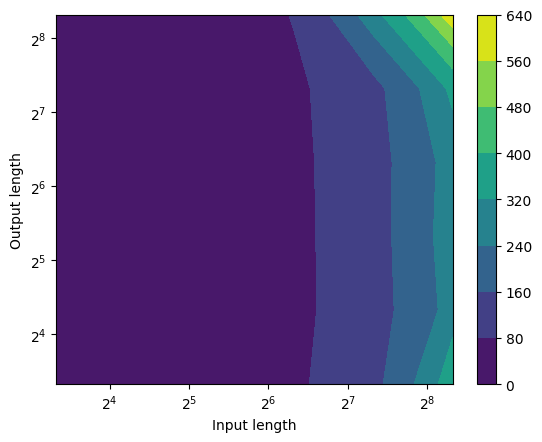

In [21]:
# contour plot of times
import matplotlib.pyplot as plt

# import numpy as np
plt.contourf(in_lens, out_lens, times)
# in_lens_repeat, out_lens_repeat = np.meshgrid(in_lens, out_lens)
# times_flat = times.flatten().numpy()
# plt.contourf(in_lens_repeat, out_lens_repeat, times_flat)
plt.xlabel("Input length")
plt.xscale("log", base=2)
plt.ylabel("Output length")
plt.yscale("log", base=2)
# add color legend
plt.colorbar()
plt.show()

## 7. Tableaux

Est-ce que le modèle sait extraire des informations de tableaux ?

In [ ]:
context = """
<p>III. – 1. Lorsque le débiteur ne dispose pas d'un taux calculé par l'administration fiscale ou lorsque l'année dont les revenus ont servi de base au calcul du taux est antérieure à l'antépénultième année par rapport à l'année de prélèvement, il est appliqué un taux proportionnel fixé dans les conditions suivantes :</p>
<center>
	<div class="table-responsive">
		<table border="1">
			<tbody><tr><th><br>
			Base mensuelle de prélèvement</th><th><br>
			Taux proportionnel</th></tr><tr><td align="justify"><br>
			Inférieure à 1 518 €</td><td align="center"><br>
			0 %</td></tr><tr><td align="justify"><br>
			Supérieure ou égale à 1 518 € et inférieure à 1 577 €</td><td align="center"><br>
			0,5 %</td></tr><tr><td align="justify"><br>
			Supérieure ou égale à 1 577 € et inférieure à 1 678 €</td><td align="center"><br>
			1,3 %</td></tr><tr><td align="justify"><br>
			Supérieure ou égale à 1 678 € et inférieure à 1 791 €</td><td align="center"><br>
			2,1 %</td></tr><tr><td align="justify"><br>
			Supérieure ou égale à 1 791 € et inférieure à 1 914 €</td><td align="center"><br>
			2,9 %</td></tr><tr><td align="justify"><br>
			Supérieure ou égale à 1 914 €</td><td align="center"><br>
			43 %</td></tr>
			</tbody>
		</table>
	</div>
</center>
"""

## 8. HTML

Est-ce que le modèle se débarasser des balises HTML ?

In [14]:
llama_7b_generator(
    (
        "Input: <p>Fixation du RSA par le ministre:<br><strong id='rsa'>450€</strong></p>\n"
        "Question: Quel est le montant du RSA?\n"
        "Réponse: 450"
        "Input: <p>Le SMIC est fixé à 1&nbsp900 <span class='unit'>euros</span>.</p>\n"
        "Question: Quel est le montant du SMIC?\n"
        "Réponse:"
    ),
    max_new_tokens=200,
    no_repeat_ngram_size=5,
)

[{'generated_text': "Input: <p>Fixation du RSA par le ministre:<br><strong id='rsa'>450€</strong></p>\nQuestion: Quel est le montant du RSA?\nRéponse: 450Input: <p>Le SMIC est fixé à 1&nbsp900 <span class='unit'>euros</span>.</p>\nQuestion: Quel est le montant du SMIC?\nRéponse: <p>1900€</p>\n\n\n\n\n</div>\n\n\n</body>\n</html>\n"}]

## 9. GPU

## 10. Compatibilité avec Metal (MPS)

In [ ]:
llama_7b_generator

llama_7b_generator.to("mps")